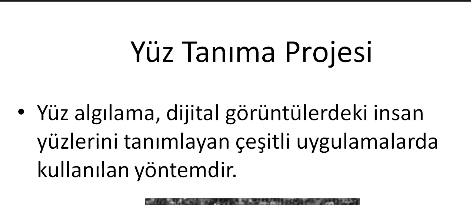

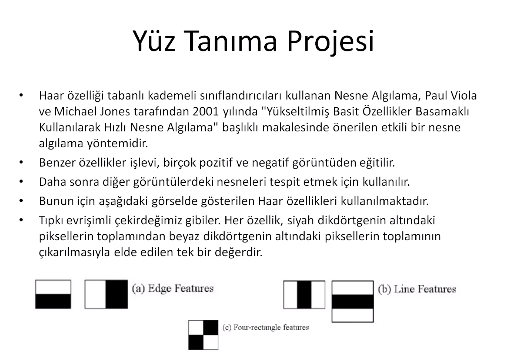

### source : https://github.com/opencv/opencv/tree/master/data/haarcascades

In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt

C:\Users\APO\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\APO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\APO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\APO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


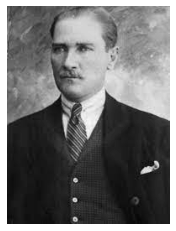

In [2]:
mka = cv2.imread("mustafa_kemal.jpg",0)

plt.figure()
plt.imshow(mka,cmap = "gray")
plt.axis("off");

In [3]:
# yüzü bulmam gerekiyor

In [4]:
# sınıflandırıcı(yüz olup olmadıgını )
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [5]:
# yüz tespit ettikten sonra bunu bir dikdörtgen içerine at 

face_rect = face_cascade.detectMultiScale(mka)

In [6]:
for (x,y,w,h ) in face_rect :          # x ,  y koordinatlarım , w genişlik , h ise yüksekliğim
                                             # ilk olarak bu dikdörtgenleri çizmemiz gerekiyor
        cv2.rectangle(mka,(x,y),           # frame,resmimin ilk hali
                        (x+w,y+h),           # dikdörtgenin sol üst ve sağ alt köşeleri(baslangıc ve bitiş)
                        (255,255,255),           # rengini 
                                3)           # kalınlıgını belirledim
                                       ### yüz  tespit ve dikdörtgen çizme işlemlerini tamamladım 
                                        ## yüzü tespit ettiğime göre gözü, yüzün içinde arayacağız 
                                        # bunun için 2 tane alan belirlemem gerekiyor  
                                        # bu alan yüz buldugumuz dikdörtgenin içi
                                        # 2 tane belirlememizin sebebi hem siyahbeyaz hem renkli alanda belirlememiz gerekiyor
                                

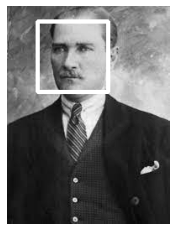

In [7]:
plt.figure()
plt.imshow(mka,cmap = "gray")
plt.axis("off");

# yüzü  tespit ettik :

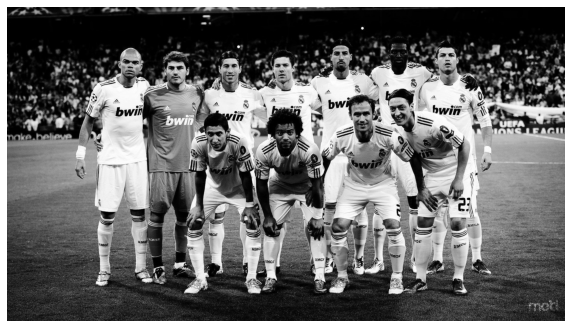

In [29]:
# Real Madrid
RM= cv2.imread("RM.jpg",0)

plt.figure(figsize=(10,6))
plt.imshow(RM,cmap = "gray")
plt.axis("off");


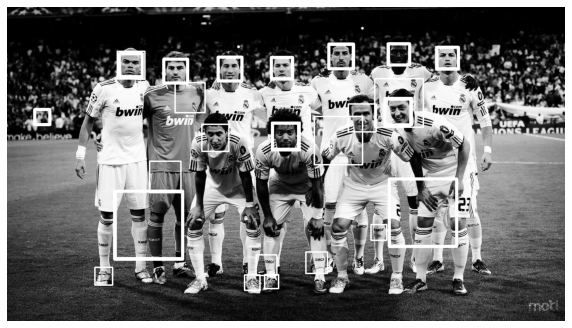

In [40]:
# yüz tespit ettikten sonra bunu bir dikdörtgen içerine at 

face_rect = face_cascade.detectMultiScale(RM)

for (x,y,w,h ) in face_rect :           
                                            
        cv2.rectangle(RM,(x,y),(x+w,y+h), (255,255,255), 10)    
        
plt.figure(figsize=(10,6))
plt.imshow(RM,cmap = "gray")
plt.axis("off");        

yanlış olan değerlerim var bunu düzeltmek için detectMultiScale bazı parametreleri ile oynamam gerekyor

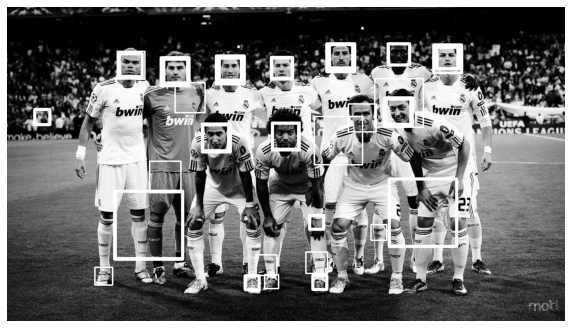

In [52]:
face_rect = face_cascade.detectMultiScale(RM, scaleFactor=1.3, 
                                 minNeighbors=4, 
                                 minSize=(30, 30),
                                 flags=cv2.CASCADE_SCALE_IMAGE )
# parametreler ile oynayarak yüzleri artırabiliriz
 
for (x,y,w,h ) in face_rect :           
                                            
        cv2.rectangle(RM,(x,y),(x+w,y+h), (255,255,255), 10)    
        
plt.figure(figsize=(10,6))
plt.imshow(RM,cmap = "gray")
plt.axis("off");    

In [48]:
# bilgisayar kamerası ile yüz yakalama

In [53]:
cap = cv2.VideoCapture(0)

while True : 
    
    ret, frame = cap.read() # bize bir frame return edecek
    
    if ret :
        face_rect = face_cascade.detectMultiScale(frame, minNeighbors = 7 )
        for (x,y,w,h ) in face_rect :           
                                            
            cv2.rectangle(frame,(x,y),(x+w,y+h), (255,255,255), 10)  
    
        cv2.imshow("face detect", frame)
      
    if cv2.waitKey(1)  & 0xFF == ord("q") : break
cap.release()
cv2.destroyAllWindows()

